###  BREAST CANCER DIAGNOSIS 

* In this project, I will use predictive modeling analysis (k-NN technique (for k=3) and the Logistic Regression technique) to classify benign and malignant cell masses.
* I will compare the generalization performance of the k-NN model with the Logistic Regression model.

#### DATA DESCRIPTION 

* Title: Wisconsin Diagnostic Breast Cancer (WDBC)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radi

* Find more details about the data at this link: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.namesus.

In [7]:
# IMPORT LIBRARIES
import pandas as pd # Library for data manipulation and analysis 
import numpy as np # Library for scientific computing 
import scipy as sp # library for scientific and technical computing
import matplotlib  # Library for plotting
import matplotlib.pyplot as plt # matplotlib plotting framework.
import seaborn as sns  # Python data visualization library based on matplotlib #
from sklearn import tree # Imports the tree module from the scikit-learn library
from sklearn.model_selection import train_test_split # train_ test_split function splits data into testing and training datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score, classification_report # This helps us check the decision tree performance.
import itertools
import requests
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
from sklearn import neighbors   # imports the neighbors module from the sklearn library.
from sklearn import linear_model        # the sklearn.linear_model module implements generalized linear models.

#### 1. IMPORT BREAST CANCER RESEARCH DATA

In [9]:
# IMPORT DATA: DIRECTLY FROM URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

#Define columns
columns = ['id', 'diagnosis', 
           'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
           'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
           'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
           'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

data = pd.read_csv(url, header=None, names=columns)

### 2. Data Exploration

In [10]:
# View the first rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# View data dimensions
data.shape

(569, 32)

* The data contains 569 observations

In [14]:
# Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* All columns, apart from "diagnosis" and "id" are float datatype

In [16]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate

In [20]:
### Create a correlation matrix heat map to explore the relationship between numerical feautures.

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


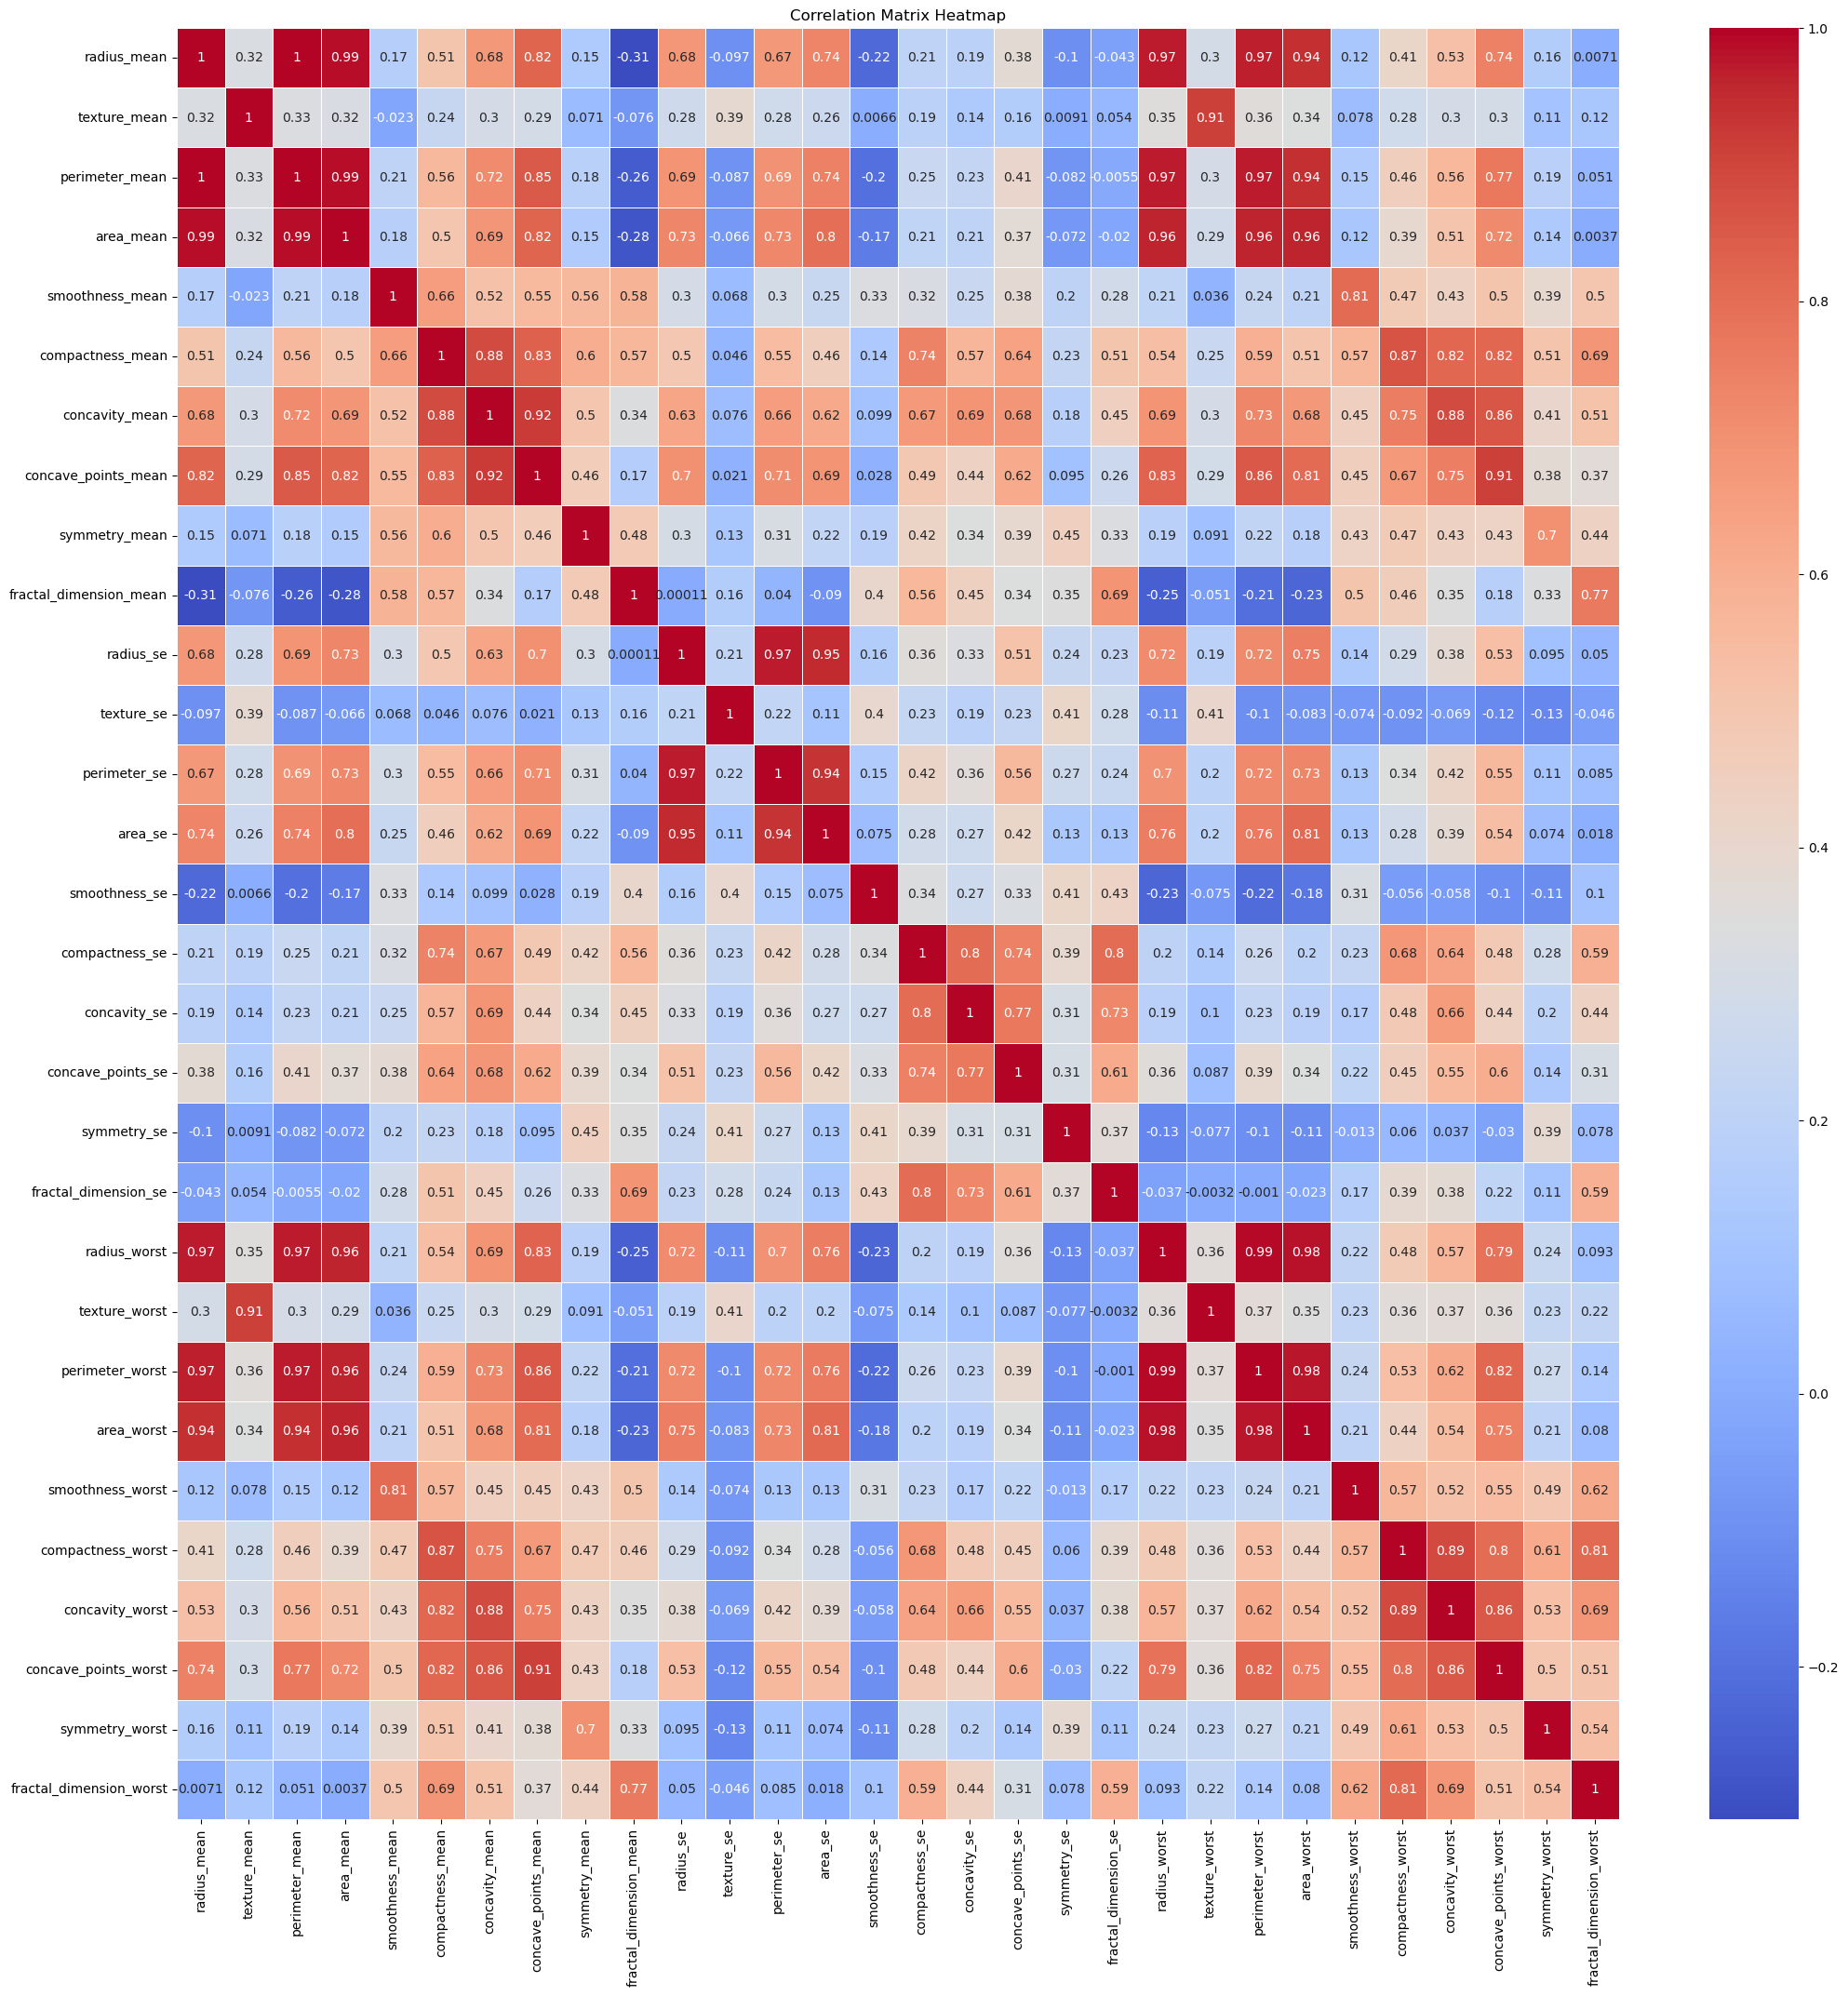

In [30]:
# Correlation matrix
correlation_matrix = data.drop(columns=['id', 'diagnosis']).corr()
# Correlation Matrix Heatmap
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\14257\AppData\Local\Temp\ipykernel_30200\1738678274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='coolwarm')


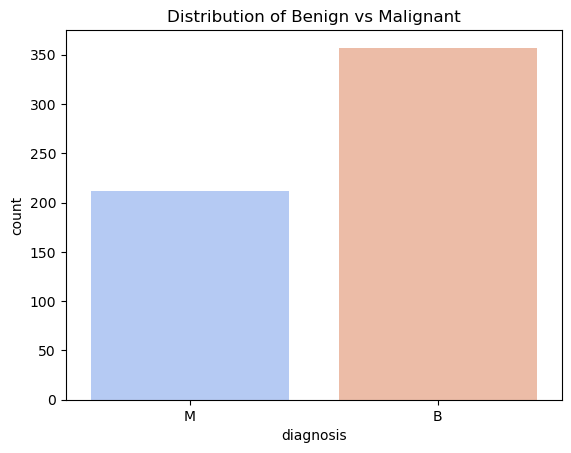

In [44]:
# Exploring the distribution of the Diagnosis column (Benign vs Malignant)
sns.countplot(x='diagnosis', data=data, palette='coolwarm')
plt.title('Distribution of Benign vs Malignant')
plt.show()

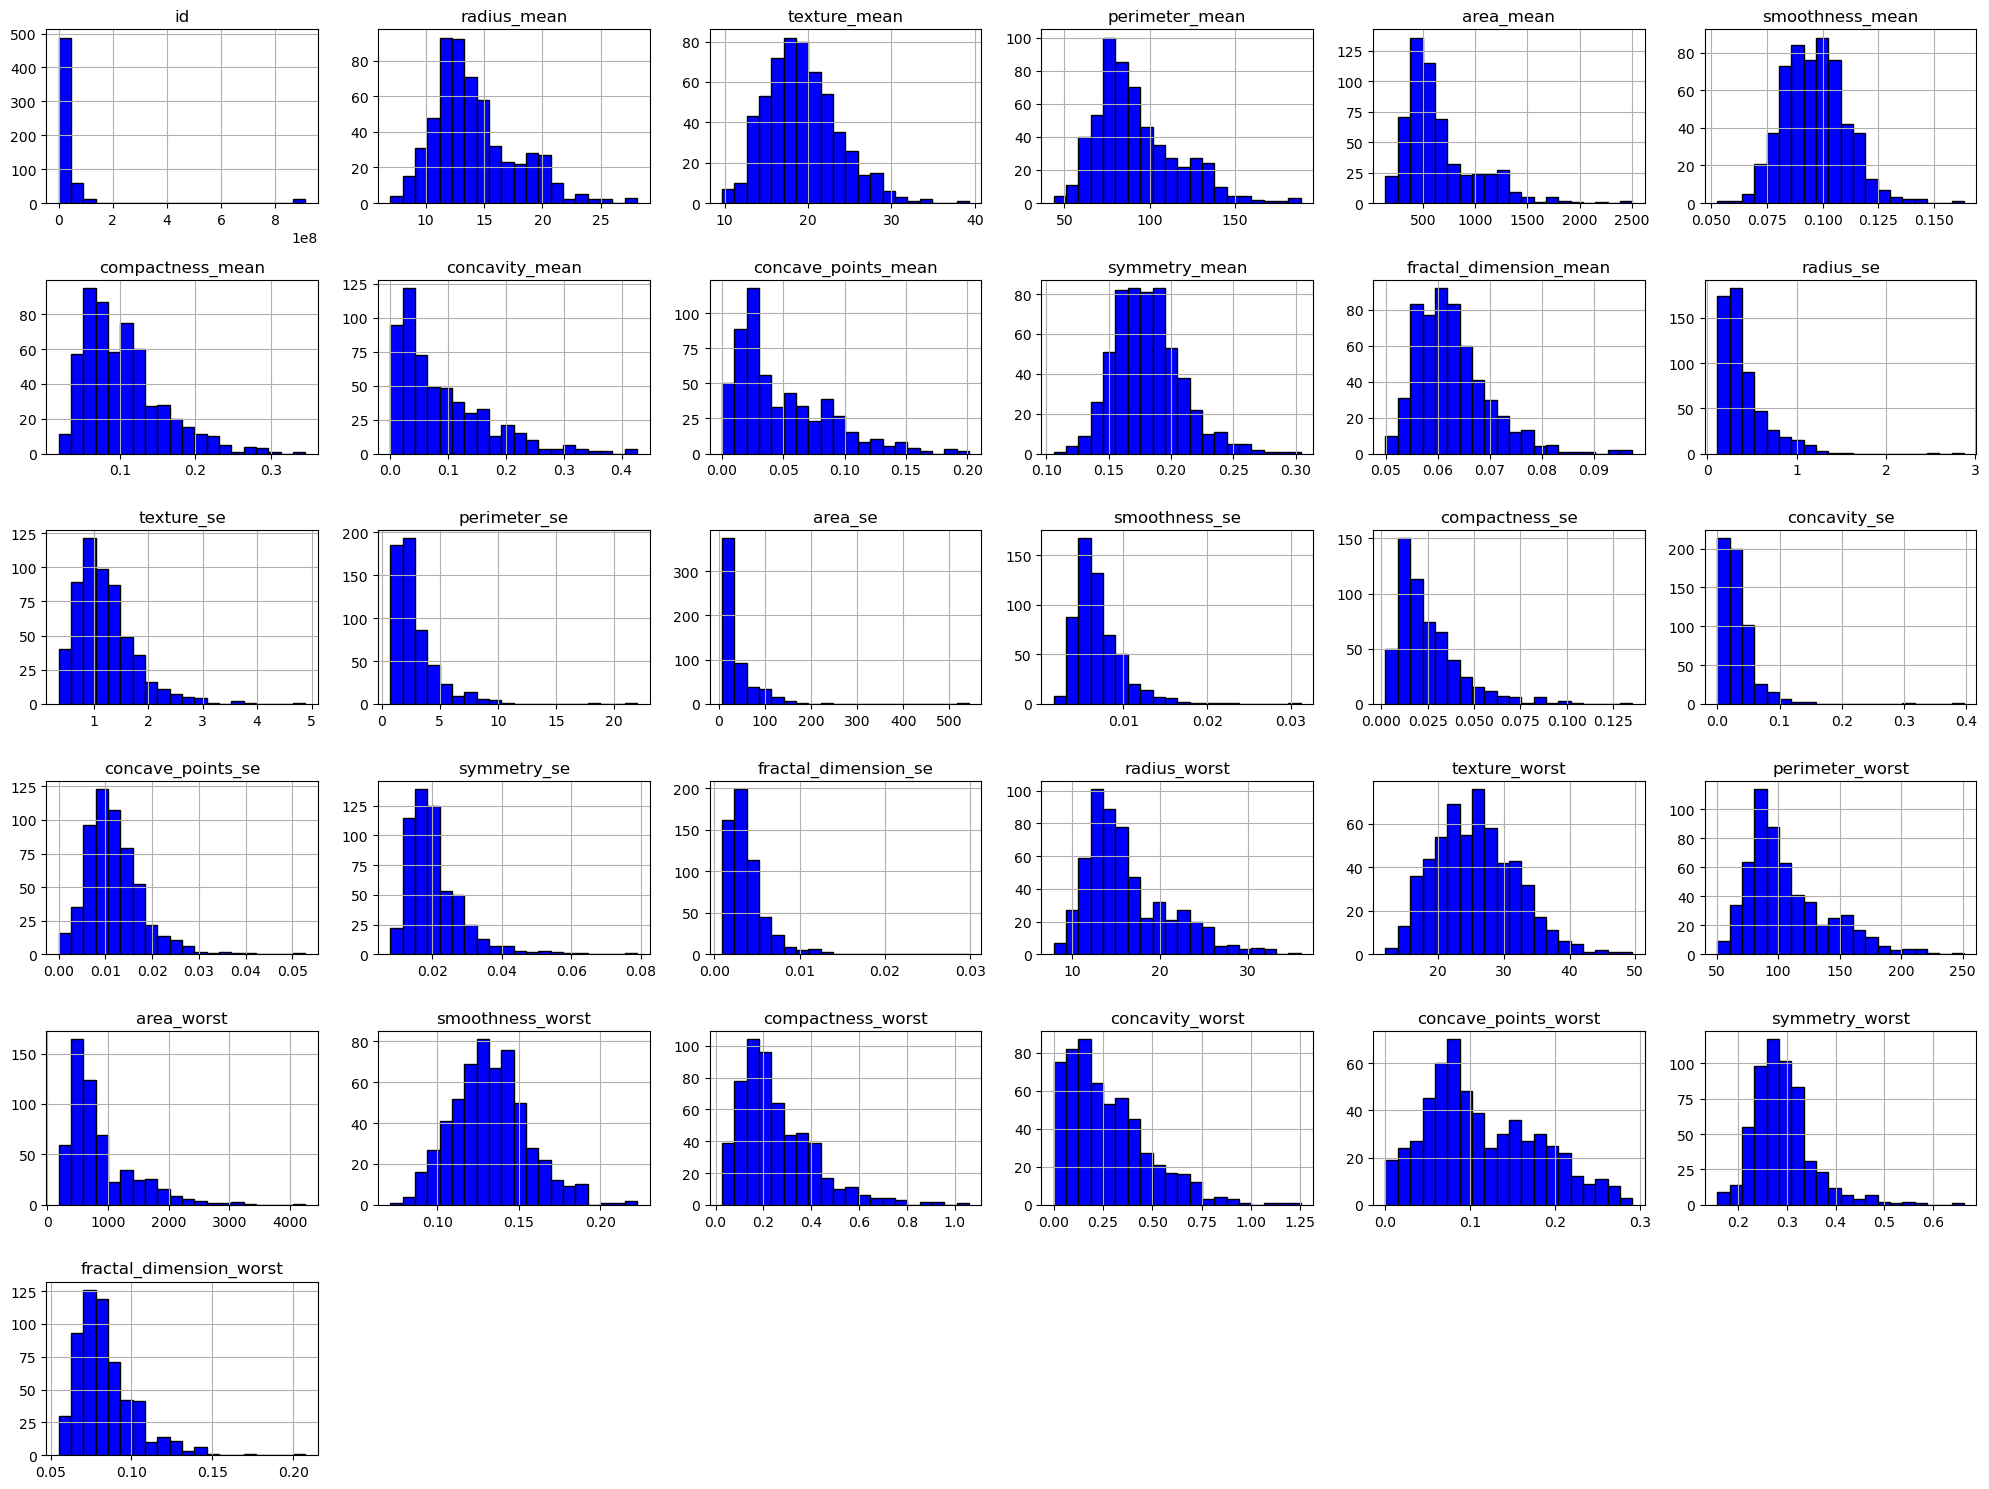

In [48]:
# Exploring the features distribution using histograms
data.hist(bins=20, figsize=(20, 15), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

## 3. Modeling

#### Relevant Metric
* Having a good Recall in a context like this is incredibly important, as a false negative (classifying a cell as “Benign”when it’s really “Malignant”) in this case would be extremely detrimental to the patient. 
* A false positive, although it would be less costly than a false negative, could also cost a healthy patient financially and emotionally if he or she is misdiagnosed as having cancer.


In [35]:
## Define the predictors and target variable
# Drop the 'id' column
X = data.drop(columns=['id', 'diagnosis'])

# Target variable (type) mapped to 0 (Benign) and 1 (Malignant)
y = data['diagnosis'].map({'B': 0, 'M': 1})

In [37]:
#use train_test_split function to get training and testing data. 
# set stratify to yes so that the distribution of classes is consistent between the original dataset and the split datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 

In [47]:
# Examining the target column distribution in the original, train and test datasets using bincount
print('Labels counts in y:', np.bincount(y)/len(y))
print('Labels counts in y_train:', np.bincount(y_train)/len(y_train))
print('Labels counts in y_test:', np.bincount(y_test)/len(y_test))

Labels counts in y: [0.62741652 0.37258348]
Labels counts in y_train: [0.62637363 0.37362637]
Labels counts in y_test: [0.63157895 0.36842105]


* The full data, train and test datasets have the same class distributions

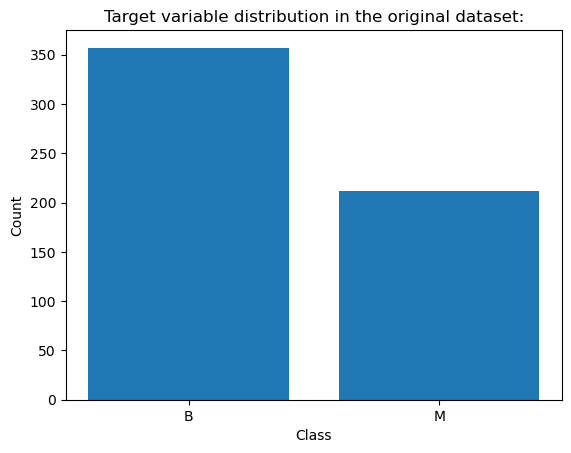

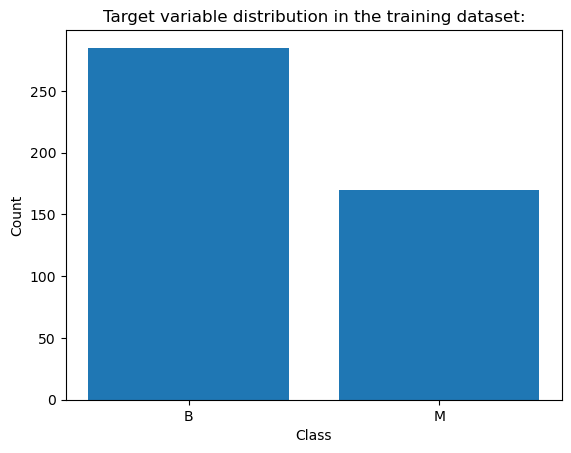

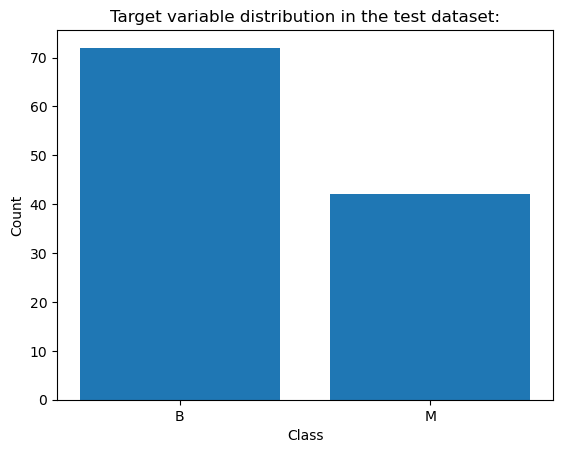

In [50]:
# Visualize the variables distribution in y, y_train and y_test 

def plot_class_distribution(y, title):
    # count values in each classes.
    counts = np.bincount(y)
    #Define the classes
    class_names = ["B", "M"]
    
    # Plot the distributions.
    plt.bar(class_names, counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Show the graphs
plot_class_distribution(y, 'Target variable distribution in the original dataset:')
plot_class_distribution(y_train, 'Target variable distribution in the training dataset:')
plot_class_distribution(y_test, 'Target variable distribution in the test dataset:')

In [63]:
# Feature standardazition/Normalization: This process standardizes the features to ensure they have the same scale.
sc = StandardScaler()
# Fitting the StandardScaler to X train dataset
sc.fit(X_train)
# Transforming the X train and X test datasets
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 1st Technique: k-NN

#### 1. Train the model

In [67]:
# Initializes a kNN classifier with specific parameters using the neigbors library.
knn = neighbors.KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski',n_jobs=-1, weights='uniform')
# Train the model on the training dataset.
knn = knn.fit(X_train_std, y_train) 

#### 2. Fit the model on standardized test set

In [70]:
# Estimate the predicted values by applying the kNN algorithm
y_pred1 = knn.predict(X_test_std)

#### 3. Evaluate the model performance

Confusion matrix, without normalization
[[71  1]
 [ 6 36]]
[[0.99 0.01]
 [0.14 0.86]]


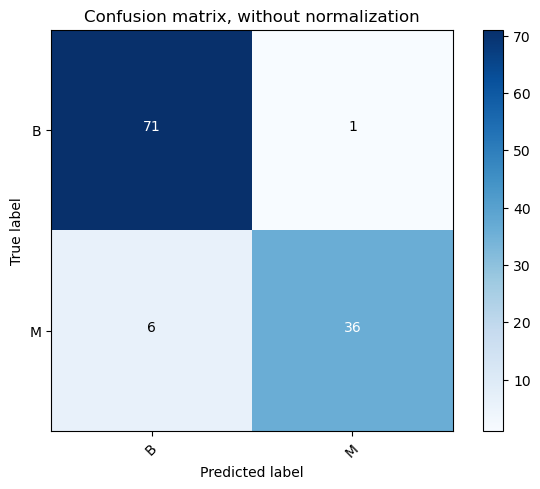

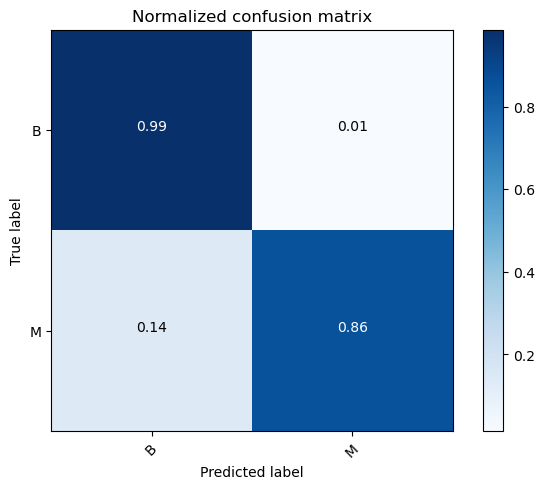

In [73]:
# Plotting confusion matrices 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)        
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt),                              
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred1)
#Determine the way floating point numbers are displayed
np.set_printoptions(precision=2)                              

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['B','M'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['B','M'],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [88]:
# Check the performance scores
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1,average='macro')
recall = recall_score(y_test, y_pred1,average='macro')
f1 = f1_score(y_test, y_pred1,average='macro')
cohen_kappa=cohen_kappa_score(y_test, y_pred1)

print(f"The accuracy score of the model is: {accuracy}")
print (f" The precison score of the model is: {precision}")
print (f" The recall score of the model is: {recall}")
print(f" The F1-Score of the model is: {f1}")
print(f" The cohen_kappa-Score of the model is: {cohen_kappa}")

The accuracy score of the model is: 0.9385964912280702
 The precison score of the model is: 0.9475254475254475
 The recall score of the model is: 0.9216269841269842
 The F1-Score of the model is: 0.9322062696457395
 The cohen_kappa-Score of the model is: 0.8646998982706002


#### 2nd Technique: Logistic Regression

#### 1. Train the model

In [92]:
# Initiate the logistic regression classifier
clf = linear_model.LogisticRegression(multi_class='auto',C=1e5,solver = 'lbfgs',max_iter=100) 
# Train the model on the training dataset
clf = clf.fit(X_train_std, y_train)

# report the coefficients: The size of coeffients captures how important the feuture will be in the model
print('The weights of the attributes are:', clf.coef_)
print('The weights of the intercepts are:', clf.intercept_)


The weights of the attributes are: [[ -27.18   -3.49  -23.46    0.59   34.39 -134.64   79.53  130.12  -66.97
    41.87  170.21 -105.29   80.35  111.35    5.71  -59.01  -73.03  131.71
   -88.19  -54.05   37.45  145.79   11.54   55.64  -34.09  -50.62  112.26
    54.68  110.26   31.95]]
The weights of the intercepts are: [33.21]


#### 2. Fit the model on standardized test set

In [95]:
 # generate classification prediction and store them in y_pred
y_pred2 = clf.predict(X_test_std) 

#### 3. Estimate the class probabilities 

In [98]:
# estimate class probabilities
y_pred_prob = clf.predict_proba(X_test_std) 
print('The predictions are:', y_pred2[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays

The predictions are: 0 [1.00e+000 2.31e-172] 1.0


#### 4. Evaluate the model

Confusion matrix, without normalization
[[70  2]
 [ 5 37]]
Normalized confusion matrix
[[0.97 0.03]
 [0.12 0.88]]


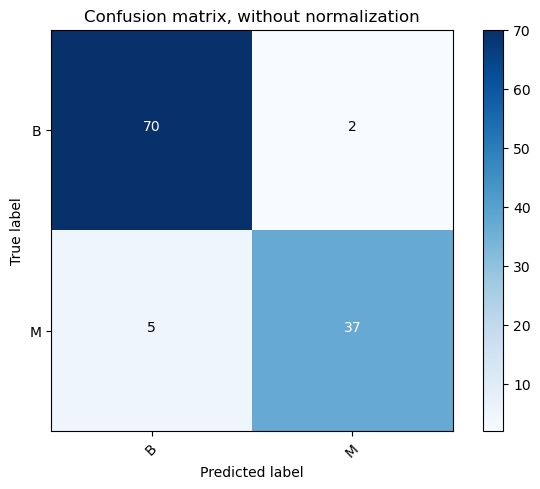

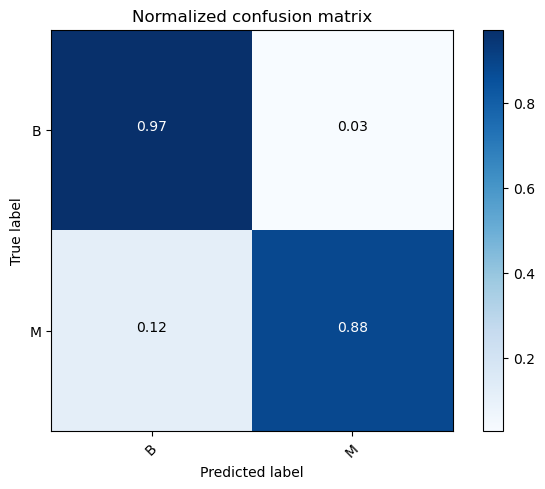

In [101]:
# Plotting confusion matrices 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         # shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       # add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          # choose format depending on whether the confusion matrix is normalized or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred2)
#Determine the way floating point numbers are displayed
np.set_printoptions(precision=2)                              # number of digits of precision for floating point output

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['B','M'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['B','M'],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [102]:
# Check the performance scores
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2,average='macro')
recall = recall_score(y_test, y_pred2,average='macro')
f1 = f1_score(y_test, y_pred2,average='macro')
cohen_kappa=cohen_kappa_score(y_test, y_pred2)

print(f"The accuracy score of the model is: {accuracy}")
print (f" The precison score of the model is: {precision}")
print (f" The recall score of the model is: {recall}")
print(f" The F1-Score of the model is: {f1}")
print(f" The cohen_kappa-Score of the model is: {cohen_kappa}")

The accuracy score of the model is: 0.9385964912280702
 The precison score of the model is: 0.941025641025641
 The recall score of the model is: 0.9265873015873016
 The F1-Score of the model is: 0.9329805996472662
 The cohen_kappa-Score of the model is: 0.8660624370594159



Comparison of Metrics:
                     Accuracy  Precision    Recall  F1-Score
k-NN                 0.938596   0.947525  0.921627  0.932206
Logistic Regression  0.938596   0.941026  0.926587  0.932981


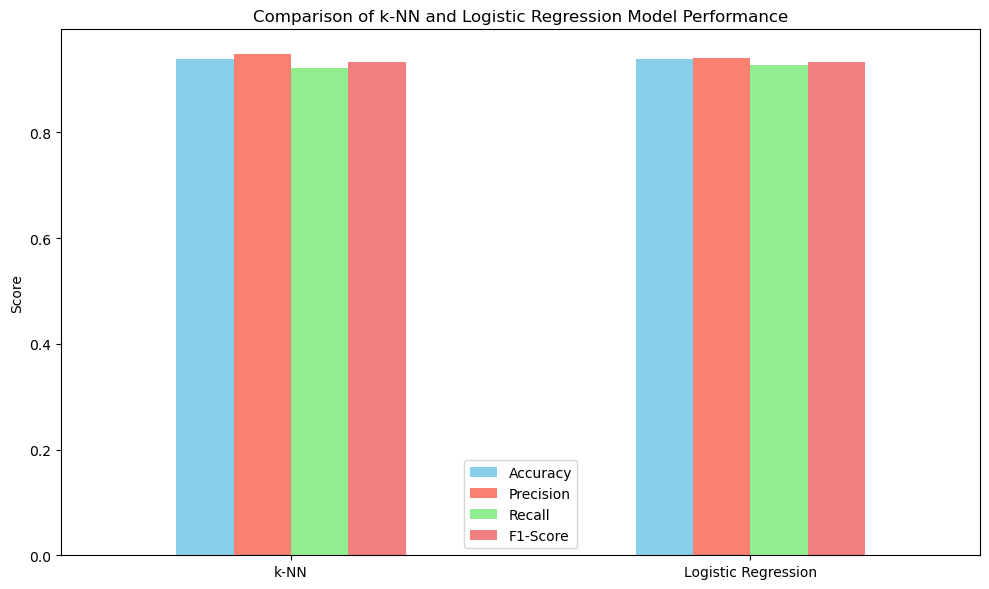

In [105]:

# Collect metrics for k-NN
metrics_knn = {
    'Accuracy': accuracy_score(y_test, y_pred1),
    'Precision': precision_score(y_test, y_pred1, average='macro'),
    'Recall': recall_score(y_test, y_pred1, average='macro'),
    'F1-Score': f1_score(y_test, y_pred1, average='macro')
}

# Collect metrics for Logistic Regression
metrics_logreg = {
    'Accuracy': accuracy_score(y_test, y_pred2),
    'Precision': precision_score(y_test, y_pred2, average='macro'),
    'Recall': recall_score(y_test, y_pred2, average='macro'),
    'F1-Score': f1_score(y_test, y_pred2, average='macro')
}

# Combine the metrics into a DataFrame for comparison
metrics_df = pd.DataFrame([metrics_knn, metrics_logreg], index=['k-NN', 'Logistic Regression'])
print("\nComparison of Metrics:")
print(metrics_df)

# Plot a bar chart for comparison
metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.title('Comparison of k-NN and Logistic Regression Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Conclusion:
* Logistic regression outperforms k-NN due to its better recall score.
* Recall [ True Positive / (True Positive + False Negative) ] is the best metric for evaluating the performance of a classifier on true positive values (aka malignant) as we would like to minimize the False Negatives as much as possible
* Our main goal is to maximize the number of correctly detected True Positive values, which indicate that the patient has cancer.

### Future recommendation:
* Tune the parameters to increase the predictive abilities of the logistic model: Although we chose the logistic regression to be the best model, a 0.926587 
recall is still not good enough, given the sensitivity of a cancer diagnosis case.
* Although split validation is used, we could also use cross-validation in order to estimate the generalization performance of the model.